In [1]:
import torch

In [2]:
words = []
with open("data/names.txt", "r") as f:
    for l in f:
        words.append(l.strip())

In [4]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [6]:
Xtr.shape

torch.Size([182625, 3])

In [8]:
g = torch.Generator().manual_seed(12345)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((200, 30), generator=g)
b1 = torch.randn((200, 1), generator=g)
W2 = torch.randn((27, 200), generator=g)
b2 = torch.randn((27, 1), generator=g)
parameters = [C, W1, b1, W2, b2]

In [9]:
for p in parameters:
    p.requires_grad = True

In [14]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [15]:
"""

200, 30 x 30 x 32 => 200, 100

(200, 100) (27, 200) x 
27 x 200 x 200 100 


"""

'\n\n200, 30 x 30 x 32 => 200, 100\n\n(200, 100) (27, 200) x \n27 x 200 x 200 100 \n\n\n'

In [110]:
b1.shape

torch.Size([200, 1])

In [111]:
b1.reshape((200, -1)).shape

torch.Size([200, 1])

In [19]:
((W1 @ C.view((-1, 30)).T) + b1).shape

torch.Size([200, 9])

In [20]:
lossi, stepi = [], []

for step in range(10000):
    ix = torch.randint(0, Xtr.shape[0], (100,))
    embs = C[Xtr[ix]] # (32 , 3, 10)
    h = torch.tanh(W1 a embs.view((-1, 30)).T + b1) # 32 x 200 
    logits = W2 @ h + b2 # (32, 27)
    loss = F.cross_entropy(logits.T, Ytr[ix])
    
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.1 if step < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    stepi.append(step)
    lossi.append(loss.log10().item())

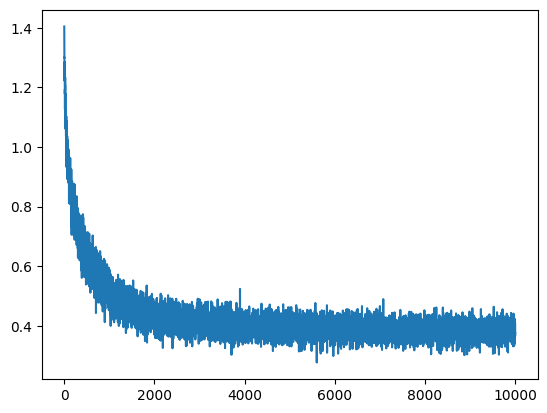

In [21]:
plt.plot(stepi, lossi)